In [1]:
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

In [20]:
def create_single_plot(path):
    df = {
            'epoch': [],
            'train accuracy': [],
            'test accuracy': []
        }

    with open(path) as f:
        line = f.readline().strip()
        while (line!='""'):
            line = f.readline().strip()
        
        lines = f.readlines()
        
        for line in lines:
            if line=='\n' or line=='epoch,train_acc,test_acc\n':
                continue
            
            values = [float(x) for x in line.strip().split(',')]

            df['epoch'].append(values[0])
            df['train accuracy'].append(values[1])
            df['test accuracy'].append(values[2])

    df_both = pd.DataFrame({
        'Epoch': df['epoch']*2,
        'Accuracy': df['train accuracy'] + df['test accuracy'],
        'Type': ['Train']*200 + ['Test']*200
    })

    sns.lineplot(x='Epoch', y='Accuracy', data=df_both, hue='Type')

def get_all_data(names, cifar='cifar10'):
    df = {
        'epoch': [],
        'train accuracy': [],
        'test accuracy': []
    }

    df_both = {
        'Epoch': [],
        'Accuracy': [],
        'Type': [],
        'Dataset': []
    }

    for path in names:
        df = {
            'epoch': [],
            'train accuracy': [],
            'test accuracy': []
        }
        with open(f'logs/{cifar}_{path}.csv') as f:
            line = f.readline().strip()
            while (line!='""'):
                line = f.readline().strip()
            
            lines = f.readlines()
            
            for line in lines:
                if line=='\n' or line=='epoch,train_acc,test_acc\n':
                    continue
                
                values = [float(x) for x in line.strip().split(',')]

                df['epoch'].append(values[0])
                df['train accuracy'].append(values[1])
                df['test accuracy'].append(values[2])

        df_both['Epoch'].extend(df['epoch']*2)
        df_both['Accuracy'].extend(df['train accuracy'] + df['test accuracy'])
        df_both['Type'].extend(['Train']*200 + ['Test']*200)
        df_both['Dataset'].extend([path]*400)

    #print(len(df_both['Epoch']))
    return pd.DataFrame(df_both)

2000


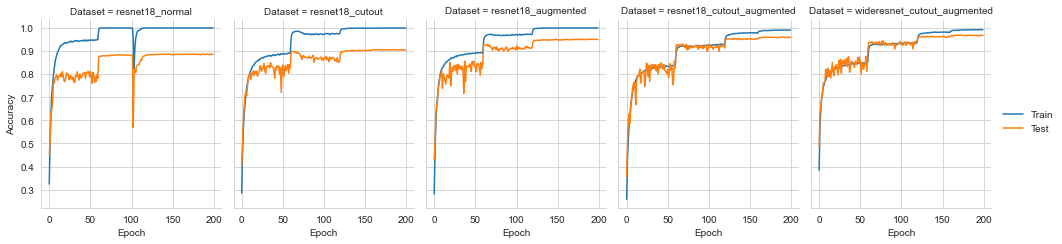

In [33]:
cifar10_data = get_all_data(
    names = [
        'resnet18_normal',
        'resnet18_cutout',
        'resnet18_augmented',
        'resnet18_cutout_augmented',
        'wideresnet_cutout_augmented'
    ],
    cifar='cifar10'
)

g = sns.FacetGrid(data=cifar10_data, col='Dataset', height=3.5, aspect=.8)
g.map_dataframe(sns.lineplot, x='Epoch', y='Accuracy', hue='Type')
g.add_legend()

2000


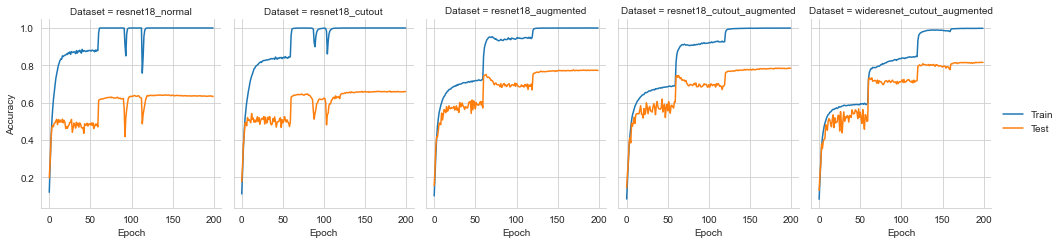

In [34]:
cifar100_data = get_all_data(
    names = [
        'resnet18_normal',
        'resnet18_cutout',
        'resnet18_augmented',
        'resnet18_cutout_augmented',
        'wideresnet_cutout_augmented'
    ],
    cifar='cifar100'
)

g = sns.FacetGrid(data=cifar100_data, col='Dataset', height=3.5, aspect=.8)
g.map_dataframe(sns.lineplot, x='Epoch', y='Accuracy', hue='Type')
g.add_legend()

<AxesSubplot:xlabel='Epoch', ylabel='Test Accuracy'>

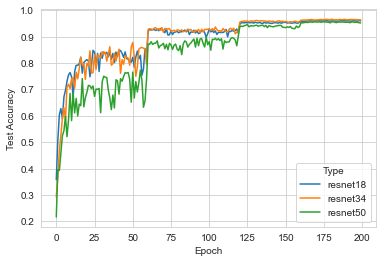

In [6]:
df = {
        'Epoch': [],
        'Type': [],
        'Test Accuracy': []
    }

for path in ['resnet18_cutout_augmented', 'resnet34', 'resnet50']:
    with open(f'logs/cifar10_{path}.csv') as f:
        line = f.readline().strip()
        while (line!='""'):
            line = f.readline().strip()
        
        lines = f.readlines()
        
        for line in lines:
            if line=='\n' or line=='epoch,train_acc,test_acc\n':
                continue
            
            values = [float(x) for x in line.strip().split(',')]

            df['Epoch'].append(values[0])
            df['Type'].append(path.strip('_cutout_augmented'))
            df['Test Accuracy'].append(values[2])

df = pd.DataFrame(df)

sns.lineplot(x='Epoch', y='Test Accuracy', data=df, hue='Type')